In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
DatosParcial2		  root_build_google_yikes.tar
DatosResonancia.root	  Temporal
FFT_imagen.ipynb	  TrimmedTree.root
FFT.ipynb		  TTreeExcercise.ipynb
FLUTEMI.WAV


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [5]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 17 21:30 drive


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
# Librerias
import ROOT
import numpy as np
from scipy  import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Welcome to JupyROOT 6.14/04


# 1. Lectura y muestra de los datos

Warning in <TROOT::Append>: Replacing existing TH1: Datos (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


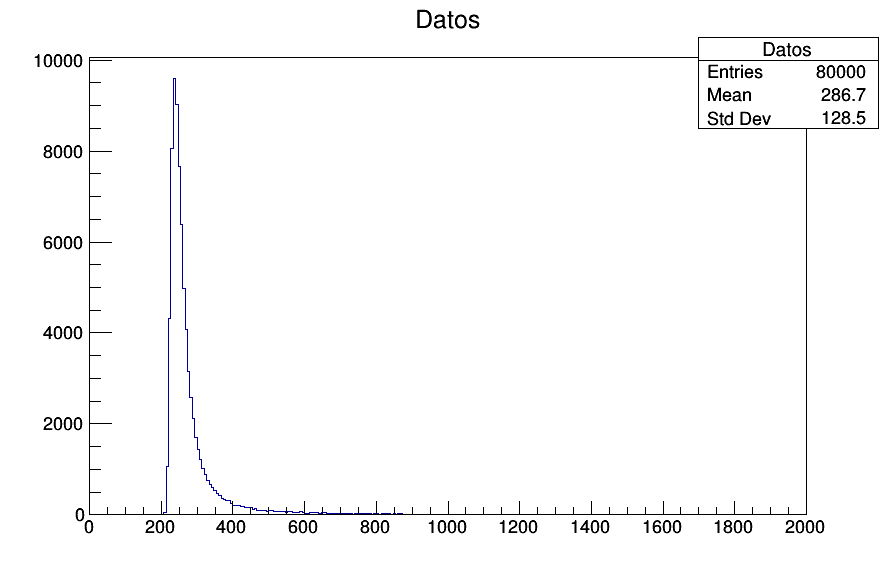

In [35]:
# Lectura de datos
!cp "/content/drive/My Drive/Semestre VIII/Física Computacional I/PyROOT/N1037658970.root" "N1037658970.root"
Data1=ROOT.TChain("SystemTree")
Data1.Add("N1037658970.root")

N=Data1.GetEntries() # Numero de datos a analizar
NBins = 300 # Numero de bins del histograma
xmin = 0
xmax = 2000

Datos = ROOT.TH1F( 'Datos','Datos', NBins, xmin, xmax )
# Se llena el histograma
for entry in Data1:
  Datos.Fill(entry.x)

# Grafica del histograma
c1 = ROOT.TCanvas( 'c1', 'Datos', 200, 10,900, 600 )
c1.SetFillColor( 0 )
Datos.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

# 2. Algoritmo de metrópolis

In [0]:
"""
Algoritmo de metropolis

*Genera N datos siguiendo la distribucion de probabilidad
de Landau. Para esta distribucion se usa la funcion de
ROOT ROOT.TMath.Landau.

Parametros
N -> Numero de datos a generar
a -> x minimo
b -> x maximo
mu 
c
"""
def metropolis(N,a,b,mu,c):
  #Valor inicial con probabilidad diferente de cero
  while True:
    phi_0 = (b-a)*np.random.random()+a
    phi = [phi_0]
    P_phi_1 = ROOT.TMath.Landau(phi[-1],mu,c, True)
    if P_phi_1 != 0.0:
      break

  while len(phi)<N:
    phi_p = (b-a)*np.random.random()+a
    P_phi_p = ROOT.TMath.Landau(phi_p,mu, c, True)
    P_phi_1 = ROOT.TMath.Landau(phi[-1],mu,c, True)
    if P_phi_p != 0.0:     
      d_S = -np.log(P_phi_p/P_phi_1)

      if d_S<0:
        phi.append(phi_p)

      elif d_S>0:
        x = np.random.random()

        if x<P_phi_p/P_phi_1:
          phi.append(phi_p)

        elif x>P_phi_p/P_phi_1:
          pass

    else:
      pass
    
  return phi
  """
  Retorna N datos
  """

In [0]:
# Se genera una muestra de N valores siguiendo la distribucion de probabilidad de Landau
mu = 200
c = 20
x = metropolis(N,xmin,xmax,mu,c)

# 3. Ajuste de los datos a la función de probabilidad de Landau 

In [0]:
"""
Calculo de chi2

Parametros
datos 
metropolis 
ndf -> Numero de grados de libertad
"""
def chi(datos,metropolis,ndf):
  chi2 = 0
  for j in range(0,ndf):
    try:
      chi2 += (datos.GetBinContent(j)-metropolis.GetBinContent(j))**2/datos.GetBinContent(j)
    except ZeroDivisionError:
      chi2 += 0  
  return chi2

In [40]:
ndf = NBins # Numero de grados de libertad

Mu = np.arange(200,300,10) # Arreglo de mu a evaluar
C = np.arange(1,6,1) # Arreglo de c a evaluar
Chi = np.zeros((len(Mu),len(C))) # Matriz  que alberga todos los chi2
Metro = ROOT.TH1F( 'Datos metropolis','Ajuste', NBins, xmin, xmax )

Warning in <TROOT::Append>: Replacing existing TH1: Datos metropolis (Potential memory leak).


In [0]:
# Evaluacion de los posibles parametros
for i,mu in enumerate(Mu):
  for j,c in enumerate(C):
    # Generar histograma con algoritmo de metropolis
    metro = metropolis(N,xmin,xmax,mu,c)
    Metropolis = Metro.Clone()
    
    # Llenar datos del histograma
    for entry in metro:
      Metropolis.Fill(entry)
    # Calcular chi2
    Chi[i][j] = chi(Datos,Metropolis,ndf)/ndf

## Gráfica de $\chi^2(\mu,c)/ndf$

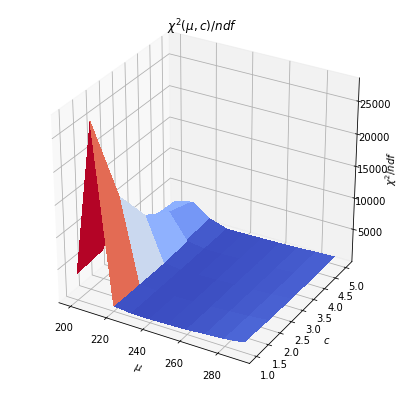

In [42]:
C_g,Mu_g = np.meshgrid(C,Mu)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Mu_g, C_g, Chi, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$c$')
ax.set_zlabel(r'$\chi^2/ndf$')
ax.set_title(r'$\chi^2(\mu,c)/ndf$')
plt.show()

In [0]:
# mu y c optimos
i,j = np.where(np.min(Chi)==Chi)
Mu_min = Mu[i[0]]
C_min = C[j[0]]

metro = metropolis(N,xmin,xmax,Mu_min,C_min)
# Llenar datos del histograma
for entry in metro:
  Metro.Fill(entry)

## Gráfica del histograma de los datos con la función de ajuste óptimo

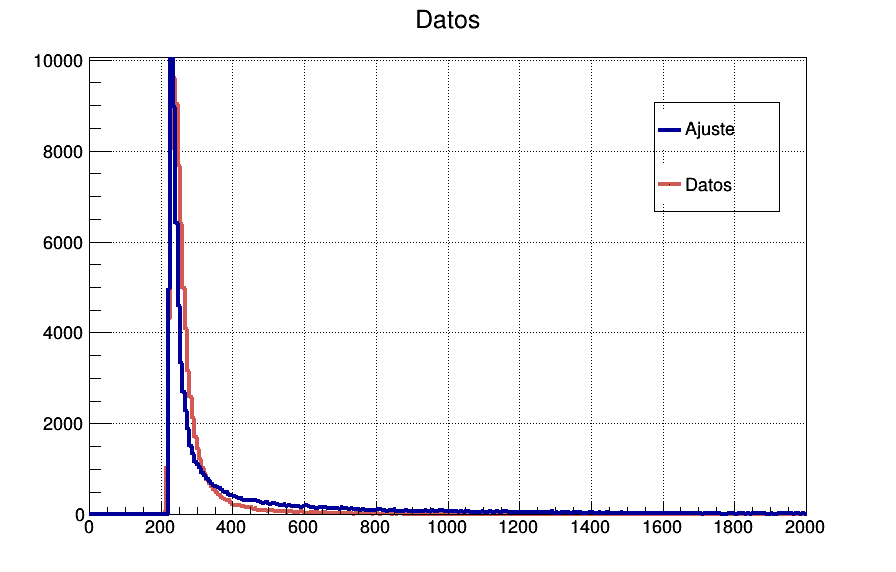

In [44]:
c1 = ROOT.TCanvas( 'c2', 'Ajuste', 200, 10, 900, 600 )
legend = ROOT.TLegend(.73,.82,.87,.63)
legend.SetFillColor(0)
legend.SetFillStyle(0)
legend.SetTextFont(42)
legend.SetTextSize(0.035)
c1.SetGridx()
c1.SetGridy()

Datos.Draw()
Datos.SetLineColor(50)
Datos.SetLineWidth(4)
Datos.SetStats(False)
Metro.Draw("Same")
Metro.SetLineWidth(4)
legend.AddEntry("Datos metropolis")
legend.AddEntry("Datos")
legend.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

In [50]:
print("mu optimo:",Mu_min)
print("c optimo:",C_min)


mu optimo: 230
c optimo: 3
